In [1]:
# 1. Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# 2. Import the dataset
df = pd.read_csv('./week9-dataset/cancer.csv')

In [2]:
# 3. Exploratory data analysis: Data Information
print(df.head())
print(df.shape)
print(df.info())

        Id  Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0  1000025                5                     1                      1   
1  1002945                5                     4                      4   
2  1015425                3                     1                      1   
3  1016277                6                     8                      8   
4  1017023                4                     1                      1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
0                  1                            2           1   
1                  5                            7          10   
2                  1                            2           2   
3                  1                            3           4   
4                  3                            2           1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1

In [3]:
# 3. Exploratory data analysis: Class Inbalance?
print(df['Class'].value_counts())
print()
print(df['Class'].value_counts()/np.float64(len(df)))   ## Data 불균형

Class
2    458
4    241
Name: count, dtype: int64

Class
2    0.655222
4    0.344778
Name: count, dtype: float64


In [4]:
# 3. Exploratory data analysis: Missing Data?
print(df.isnull().sum())

Id                             0
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [5]:
df = df.drop(columns=['Id'])
df = df.drop(columns=['Bare_Nuclei'])

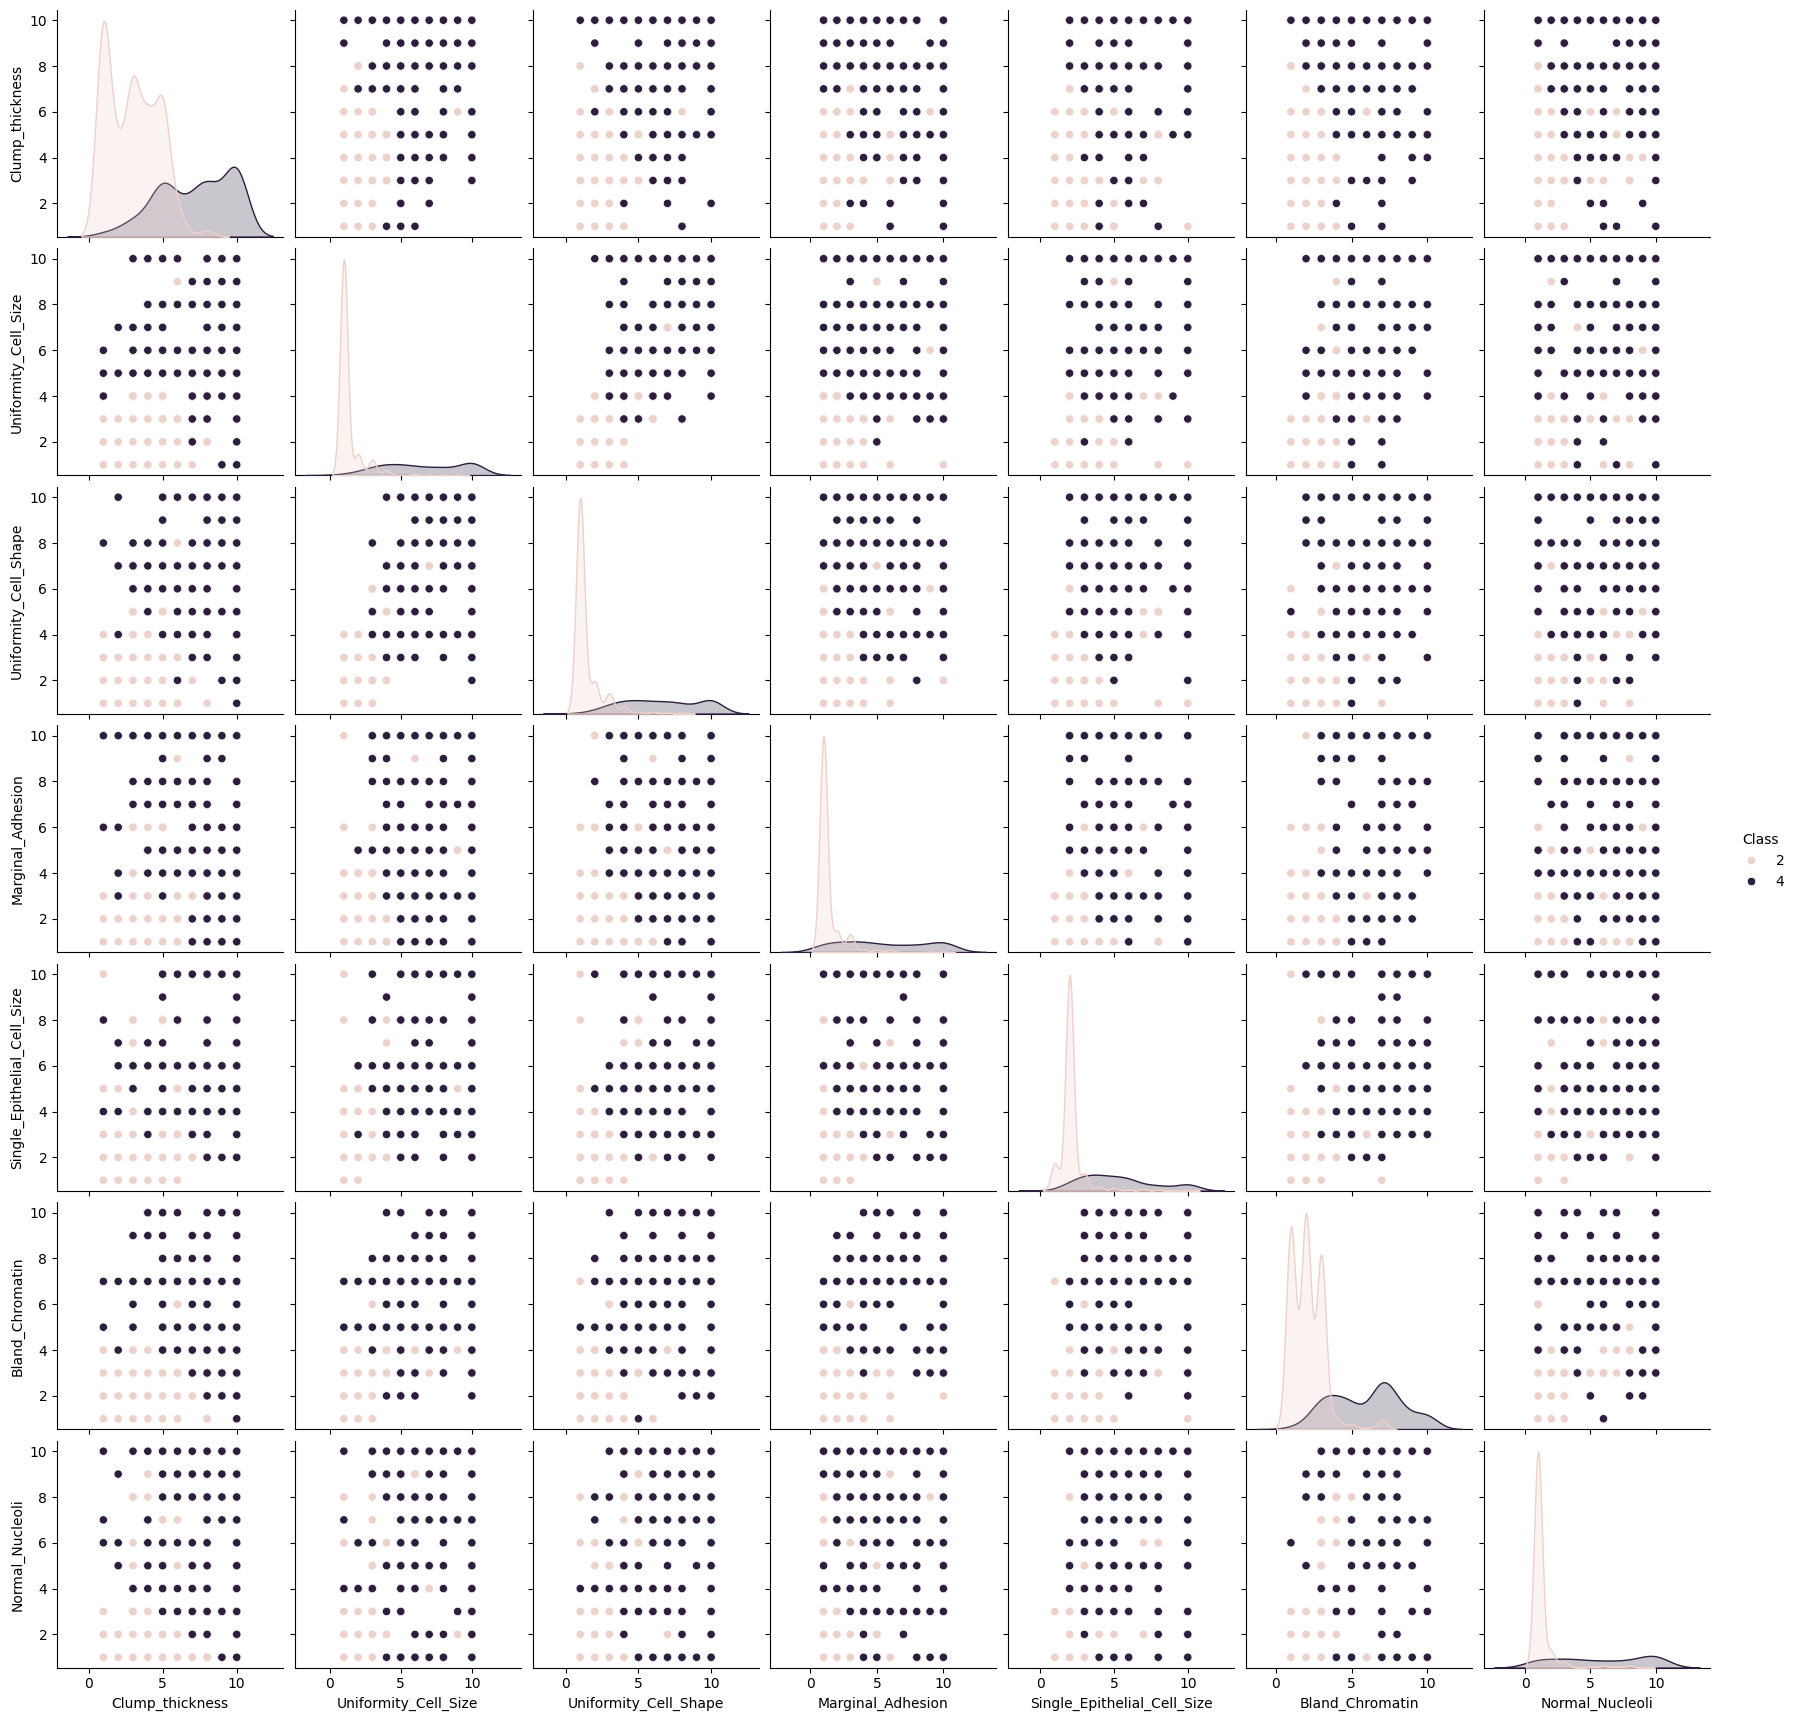

In [22]:
import seaborn as sns
# Pair Plot
sns.pairplot(df, hue='Class', diag_kind='kde')
plt.show()

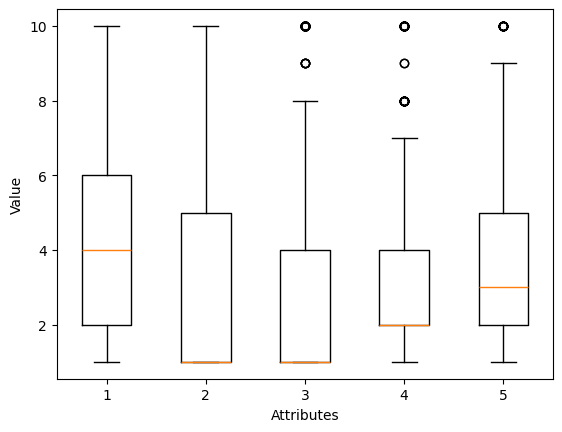

In [6]:
# 3. Exploratory data analysis: Outliers?
data_to_boxplot = [df["Clump_thickness"], df["Uniformity_Cell_Size"], df["Marginal_Adhesion"], df["Single_Epithelial_Cell_Size"], df["Bland_Chromatin"]]
plt.boxplot(data_to_boxplot)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

In [7]:
# 4. Split data into separate training and test set
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.3, 
	random_state=4)

#print(X_train)
#print(y_train)
#print(X_test)
#print(y_test)

#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)

In [8]:
# 5. Fit K Neighbours Classifier to the training set
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)

[4 2 2 4 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 4 2
 4 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 2 4 4 4 2 2 2 4 2 2 4 4 2
 2 2 4 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2
 2 2 4 2 4 4 2 2 2 4 2 4 2 2 2 2 4 2 4 2 2 2 4 2 4 2 2 4 4 4 2 2 2 2 4 2 2
 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 2 2 2 2 4 2 4 4 4 2 4 2 2 4 2 4 2
 2 2 2 4 4 2 4 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2]


In [9]:
# 6. Check Accuracy Score
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[[136   2]
 [  9  63]]
0.9476190476190476


[0.9333333333333333, 0.9047619047619048, 0.9428571428571428, 0.9285714285714286, 0.9476190476190476, 0.9428571428571428, 0.9476190476190476, 0.9428571428571428, 0.9476190476190476, 0.9428571428571428, 0.9523809523809523, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9476190476190476, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9428571428571428, 0.9476190476190476, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428]


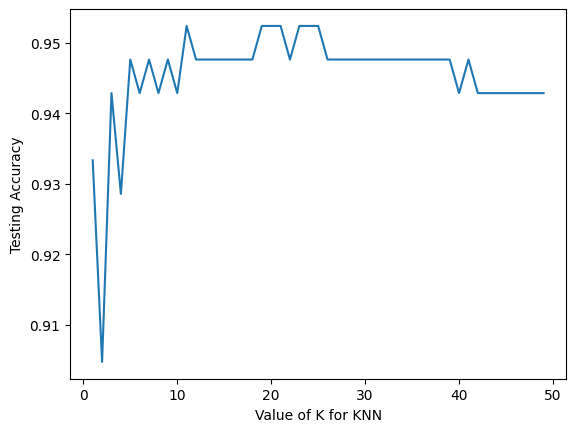

In [10]:
# 7. Improving Accuracy: Tuning k parameter 
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [12]:
# 5. Fit K Neighbours Classifier to the training set
classifier = KNeighborsClassifier(n_neighbors = 20)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)

print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[4 2 2 4 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 4 2
 4 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 2 4 4 4 2 2 2 4 2 2 4 4 2
 2 2 4 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 4 4 2 4 2 2 2 2 2 2 2 2 2 2
 2 2 4 2 4 4 2 2 2 4 2 4 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 4 4 4 2 2 2 2 4 2 2
 4 2 2 2 2 2 2 2 2 2 4 2 4 2 2 4 2 4 2 4 2 2 2 2 4 2 4 4 4 2 4 2 2 4 2 4 2
 2 2 2 4 4 2 4 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2]
[[136   2]
 [  8  64]]
0.9523809523809523


<Axes: >

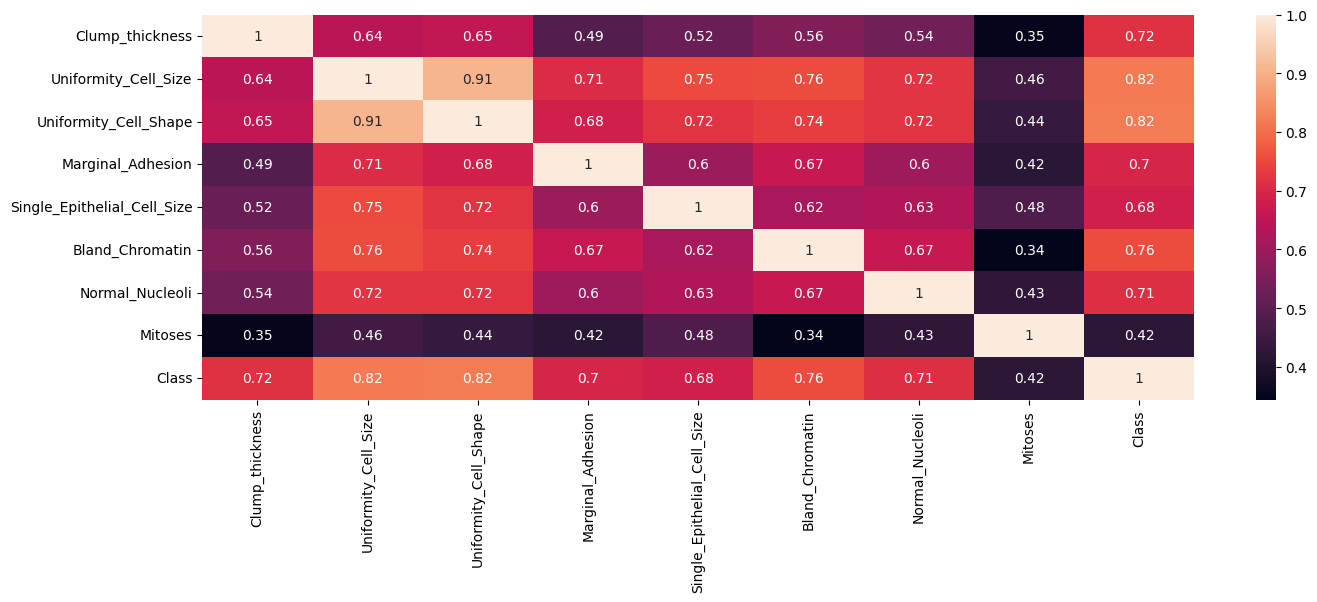

In [13]:
# 9. Improving Accuracy: Feature Engineering
dfcorr = df.corr()
plt.figure(figsize=(16,5))
sns.heatmap(data = dfcorr, annot=True)

In [15]:
df = df.drop(columns=['Mitoses'])
# 4. Split data into separate training and test set
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.3, 
	random_state=4)

[0.9428571428571428, 0.8952380952380953, 0.9476190476190476, 0.9380952380952381, 0.9476190476190476, 0.9476190476190476, 0.9523809523809523, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9571428571428572, 0.9523809523809523, 0.9523809523809523, 0.9476190476190476, 0.9523809523809523, 0.9476190476190476, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428]


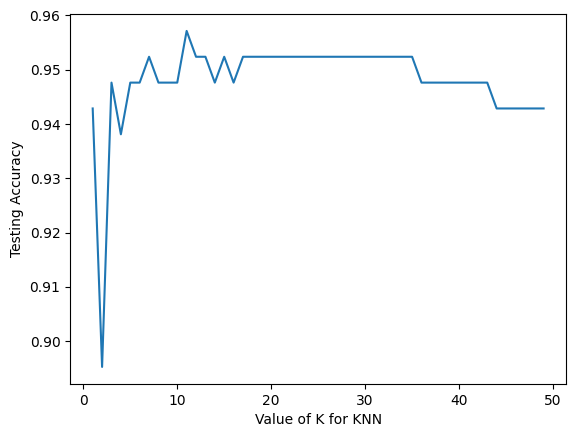

In [16]:
# 7. Improving Accuracy: Tuning k parameter 
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [17]:
classifier = KNeighborsClassifier(n_neighbors = 11)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)

print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[4 2 2 4 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 4 2
 4 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 2 4 4 4 2 2 2 4 2 2 4 4 2
 2 2 4 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 4 4 2 4 2 2 2 2 2 2 2 2 2 2
 2 2 4 2 4 4 2 2 2 4 2 4 2 2 2 2 4 2 4 2 2 2 4 2 4 2 2 4 4 4 2 2 2 2 4 2 2
 4 2 2 2 2 2 2 2 2 2 4 2 4 2 2 4 2 4 2 4 2 2 2 2 4 2 4 4 4 2 4 2 2 4 2 4 2
 2 2 2 4 4 2 4 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2]
[[136   2]
 [  7  65]]
0.9571428571428572


[0.9714285714285714, 0.9142857142857143, 0.9714285714285714, 0.9714285714285714, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9857142857142858, 1.0, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 1.0, 0.9857142857142858, 1.0, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858]


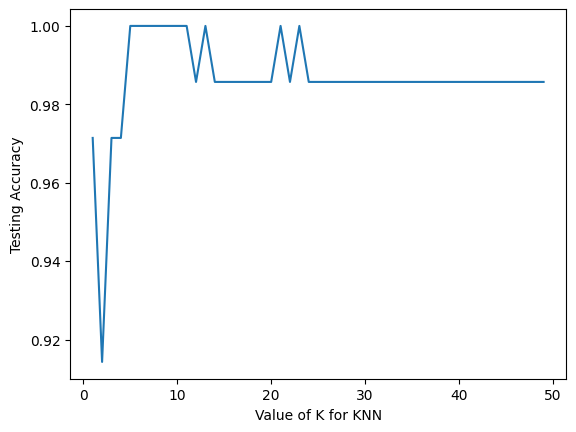

In [18]:
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.1, 
	random_state=4)

k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [19]:
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)

print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[4 2 2 4 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 4 2 2 4 4 2 4 2 2 2 4 2
 4 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 2 4 4 4 2 2 2 4 2]
[[44  0]
 [ 0 26]]
1.0


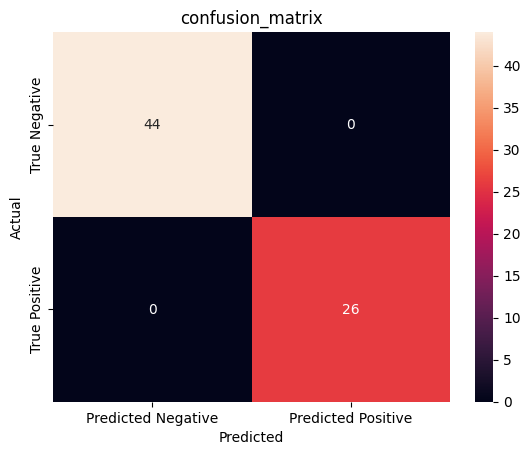

In [20]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, guesses), annot=True, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion_matrix')
plt.show()

[0.95, 0.8785714285714286, 0.9357142857142857, 0.9357142857142857, 0.95, 0.95, 0.95, 0.9428571428571428, 0.95, 0.9357142857142857, 0.95, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9357142857142857, 0.9428571428571428, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857]


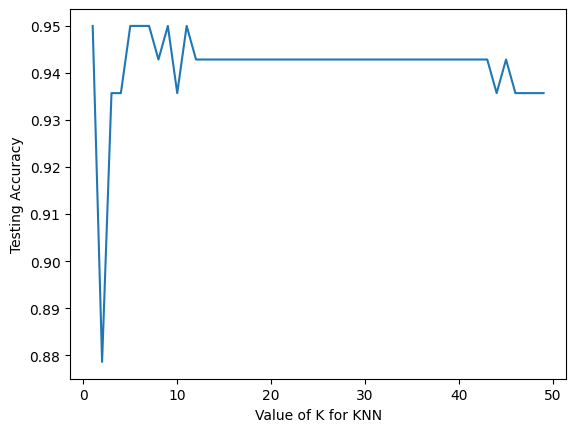

In [21]:
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.2, 
	random_state=4)

k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()